In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Titanic-Dataset.csv')

### Understanding the data

1) How big is the data?

In [28]:
df.shape

(891, 12)

2. How does the data look like?

In [29]:
df.head()
#or df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Get idea of what each column refers

In [30]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 📄 Titanic Dataset: Column Descriptions

| Column Name   | Description |
|---------------|-------------|
| **PassengerId** | Unique ID for each passenger. |
| **Survived**     | Survival status (`0` = Did not survive, `1` = Survived). |
| **Pclass**       | Ticket class (`1` = 1st, `2` = 2nd, `3` = 3rd). Represents socio-economic status. |
| **Name**         | Full name of the passenger (often includes titles like Mr., Mrs., etc.). |
| **Sex**          | Gender of the passenger (`male` or `female`). |
| **Age**          | Age in years. May have missing values. |
| **SibSp**        | Number of siblings and spouses aboard the Titanic. |
| **Parch**        | Number of parents and children aboard the Titanic. |
| **Ticket**       | Ticket number (may be shared within families or groups). |
| **Fare**         | Amount paid for the ticket (in British pounds). |
| **Cabin**        | Cabin number (many missing entries). |
| **Embarked**     | Port of embarkation:<br>`C` = Cherbourg(France)<br>`Q` = Queenstown(Ireland)<br>`S`= Southampton(England).Embarked indicates the port (city) where the passenger got on the Titanic.|


3) What is the data type of the cols?

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can change the data type eg if some column is numerical but object is created we can change that.<br>
similarly here for age just int is sufficient but float is used leading to increase in memory

4) Are there any missing values?

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

5) How does the data look mathematically ?

In [33]:
df.describe() #gives mathematical details of non object columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


here describe() gives the statistics of the dataframe's numeric features but some features like passengerId are just the id which statistics does make sense<br>
similarly some features like survived which is actually categorical although encoded in numerical value so it also doesnt make sense

5) Are there duplicate values?

In [34]:
df.duplicated().sum()

np.int64(0)

df.duplicated() – What it does:
It returns a Boolean Series, where:

True means the row is a duplicate of a previous row.

False means the row is unique up to that point.



To remove them do:
df = df.drop_duplicates()

7) How is the correlation between cols ?

📊 What is Correlation Between Columns?
Correlation measures the strength and direction of a linear relationship between two variables (i.e., columns).

It is usually calculated using Pearson’s correlation coefficient (ranges from -1 to 1):

+1: Perfect positive correlation (as one increases, so does the other)

0: No linear correlation

-1: Perfect negative correlation (as one increases, the other decreases)

🧮 How Is It Calculated?
In pandas:

python
Copy code
df.corr()
This gives you a correlation matrix, showing correlation between every pair of numeric columns.

🧪 Why Is Correlation Calculated in EDA (Exploratory Data Analysis)?
EDA is all about understanding your data, and correlation helps you:

1. Detect Multicollinearity
If two or more features are highly correlated, they carry redundant information.

This can negatively affect models, especially linear models like regression.

2. Select Relevant Features
Strongly correlated features with the target variable are often good predictors.

Weakly or non-correlated features may not be useful.

3. Better Visualization
Helps decide which feature pairs to plot in scatter plots or pair plots.

4. Understand Relationships
Example: In a student dataset, if "study_hours" and "marks" are highly correlated, it supports the assumption that more study leads to better marks.



In [35]:
numeric_col = df.select_dtypes(include='number') #selects all columns with numeric data type

In [36]:
numeric_col.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [37]:
numeric_col.corr()['Survived'] #for only op column

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

Insights from corr matrix:<br>
1) People with high class ticket(1) had better chance of survival (as class inc to 2,3 ie. low),prob decreased<br>
2) people with high ticket fare more tended to survive more  Makes sense: higher class, higher fare. <br>
3) Age: -0.08 — Slight negative correlation. Older passengers had slightly lower survival.<br>
4) Parch: +0.08 — Traveling with parents/children slightly improved chances.<br>
5) SibSp: -0.03 — Slight negative. Having siblings/spouses aboard didn’t help much.


🔸 Other correlations:
SibSp and Parch: +0.41 — Logical: people traveling with siblings often also had parents/children aboard.<br>
Pclass and Fare: -0.55 — Strong negative. Higher classes (lower Pclass) paid more.



Descriptive Stats Insights (df.describe())

 Fare:
Mean: 32, Max: 512 — Heavy right-skew (some paid a lot more).

Median is 14.5 < Mean → confirms skewness.

🧠 Insight: Might need log transformation to reduce skew when modeling.

This method is a quick visualizing method although actual skewness can be seen in curve or from .skew() function

# Univariate Analysis

Analysing each features(numerical + categorical) one by one

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets first focus on Categorical Data

1) survived

first question is how many survived and how many didnt?


<Axes: xlabel='Survived', ylabel='count'>

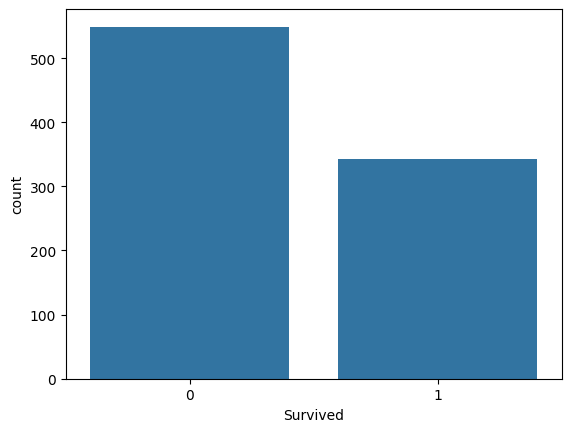

In [ ]:

sns.countplot(x='Survived', data=df)
# or df['Survived'].value_counts().plot(kind='bar')

so more people were died 

for same data in percentage

<Axes: ylabel='count'>

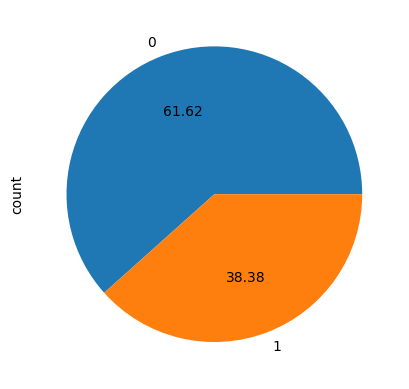

In [50]:
df['Survived'].value_counts().plot(kind='pie',autopct = '%.2f')

Numerical Data

1. 

like in categorical data here we cant actually find counts of each class but can divide values into bins and find their counts ie Histogram

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

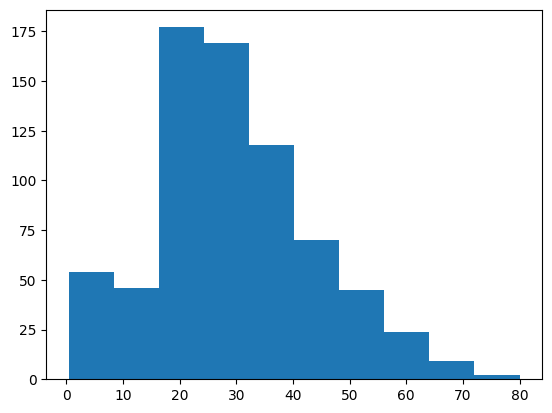

In [51]:
plt.hist(df['Age'])

can change no of bins as

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

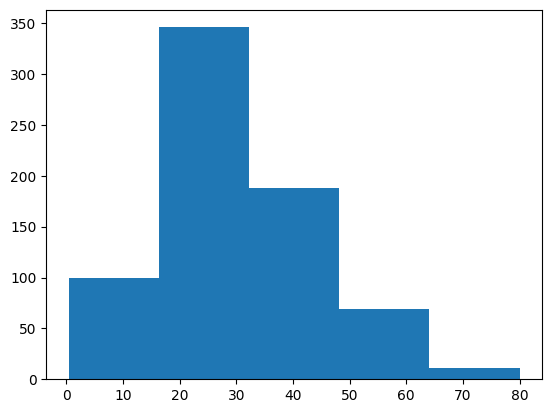

In [52]:
plt.hist(df['Age'],bins=5)

so more people were of mid age in the ship

more improved version of histplot:<br>
histogram gives exact number of each bins but in top of that distplot gives kernel density estimate(kde) that estimates the probability density function of the data.

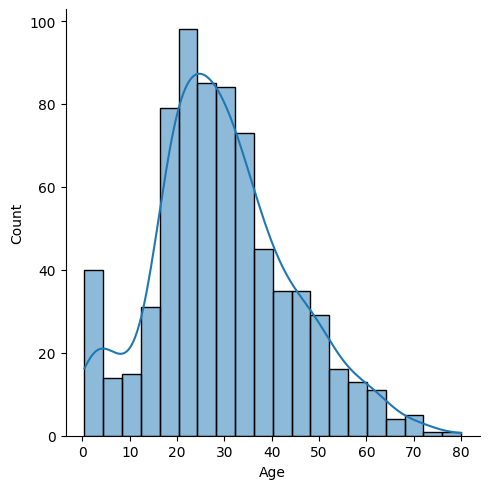

In [55]:
sns.displot(df['Age'],kind='hist', kde=True)

now if we need 5 number summary of data:we need boxplot
<img src="./boxplot.webp">


min = Q1 - 1.5 * IQR <br>
max = Q3 + 1.5 * IQR <br>
IQR = Q3 - Q1

Outside Q1 and Q3 others are outliers

<Axes: ylabel='Fare'>

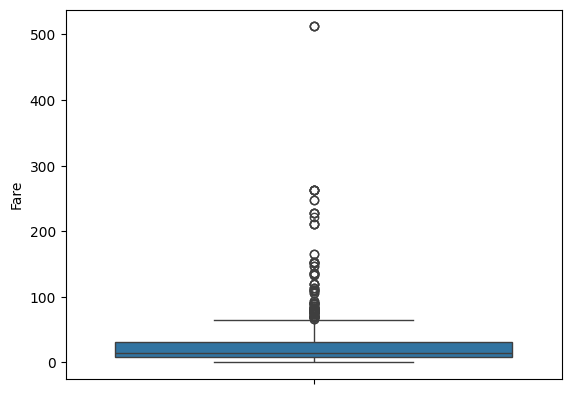

In [56]:
sns.boxplot(df['Fare'])

Median closer to the bottom of the box:

The horizontal line (median) is not centered, it's closer to Q1.

This means more values are bunched up on the lower side.

Longer upper whisker:

The line (whisker) above the box is much longer than the one below.

This indicates a wider spread of high values (extreme right tail).

Many outliers on the upper end:

The dots above the whisker (outliers) are concentrated on the high value side, not below.

This is a classic sign of positive skew — a few large values pulling the tail rightward.

now can check skew()

In [57]:
df['Age'].skew()

np.float64(0.38910778230082704)

## Biraviate and Multivariate Analysis

In [58]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [62]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


for two columns say (Numerical - Numerical)

for numerical- numerical columns qsn is the graph between them ie scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

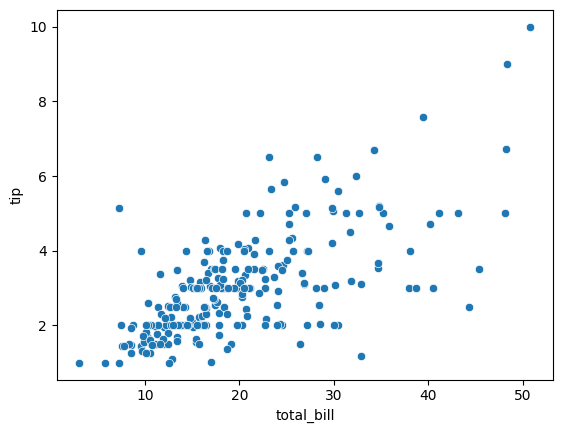

In [63]:
sns.scatterplot(x='total_bill',y='tip',data = tips)

clearly the relationship is almost linear

now for the same usecase if we need third variable (categorical) say Sex for multivariate analysis 

<Axes: xlabel='total_bill', ylabel='tip'>

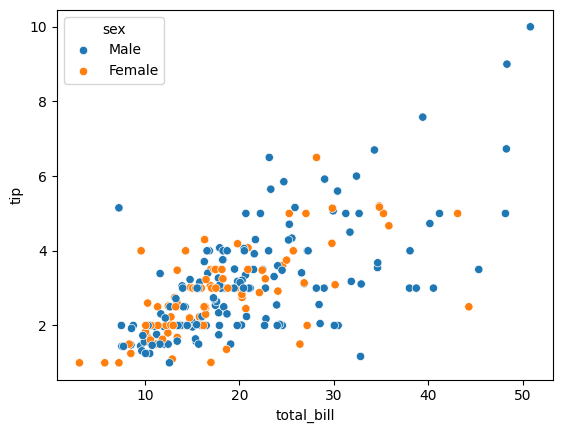

In [ ]:
sns.scatterplot(x='total_bill',y='tip',data = tips,hue='sex')

now lets say we want to add next feature also say smoker 

<Axes: xlabel='total_bill', ylabel='tip'>

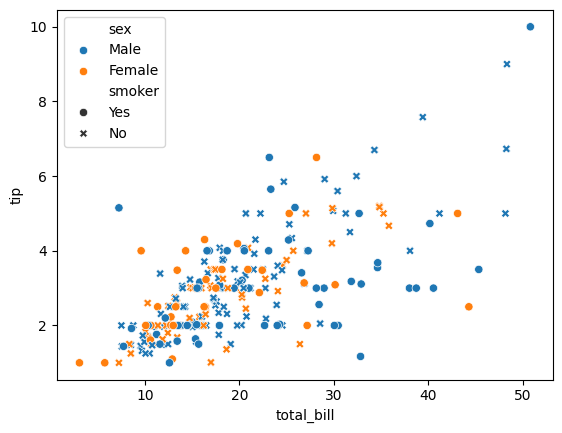

In [67]:
sns.scatterplot(x='total_bill',y='tip',data = tips,hue='sex',style='smoker')

say one more say size

<Axes: xlabel='total_bill', ylabel='tip'>

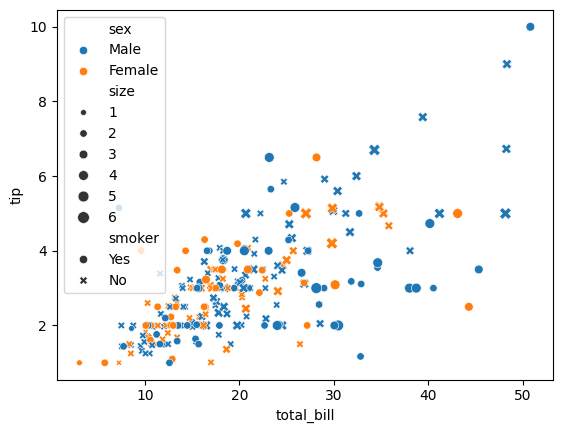

In [68]:
sns.scatterplot(x='total_bill',y='tip',data = tips,hue='sex',style='smoker',size='size')

# Lineplot - connecting each points of scatter plot

used when x axis is time or date or yr or month etc time based

In [106]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


if i need to plot in each year how many passengers travel

<Axes: xlabel='year', ylabel='passengers'>

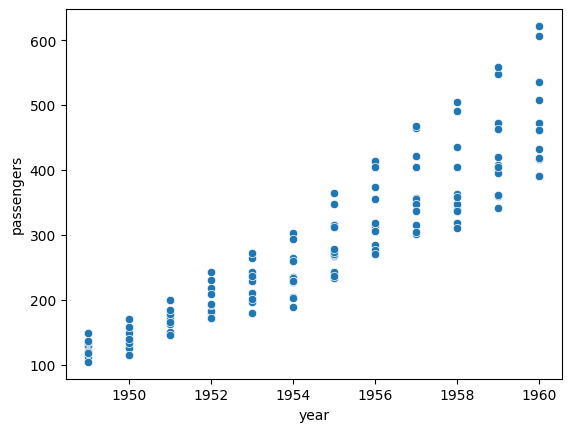

In [108]:
sns.scatterplot(x='year',y='passengers',data=flights)

since for each year there are multiple entries lets combine them first as sum

In [118]:
yearly_data = flights.groupby('year')['passengers'].sum().reset_index()
yearly_data

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

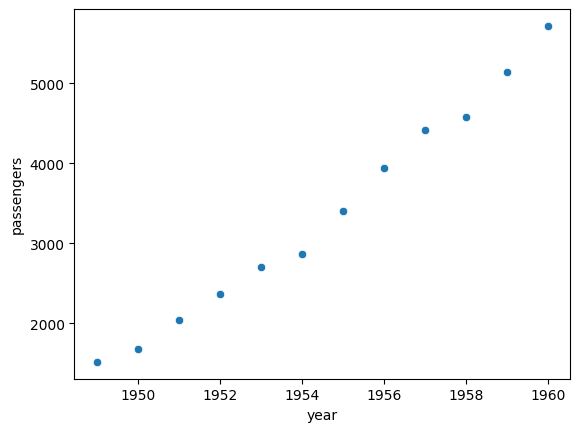

In [119]:
sns.scatterplot(x='year',y='passengers',data=yearly_data)

<Axes: xlabel='year', ylabel='passengers'>

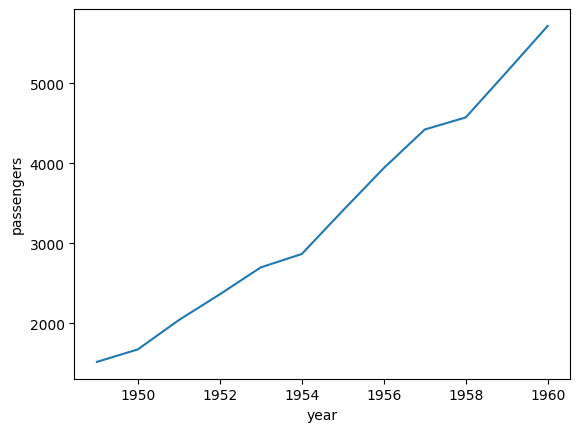

In [120]:
sns.lineplot(x='year',y='passengers',data=yearly_data)

# pairplot - combination of scatterplots

plots 

In [101]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


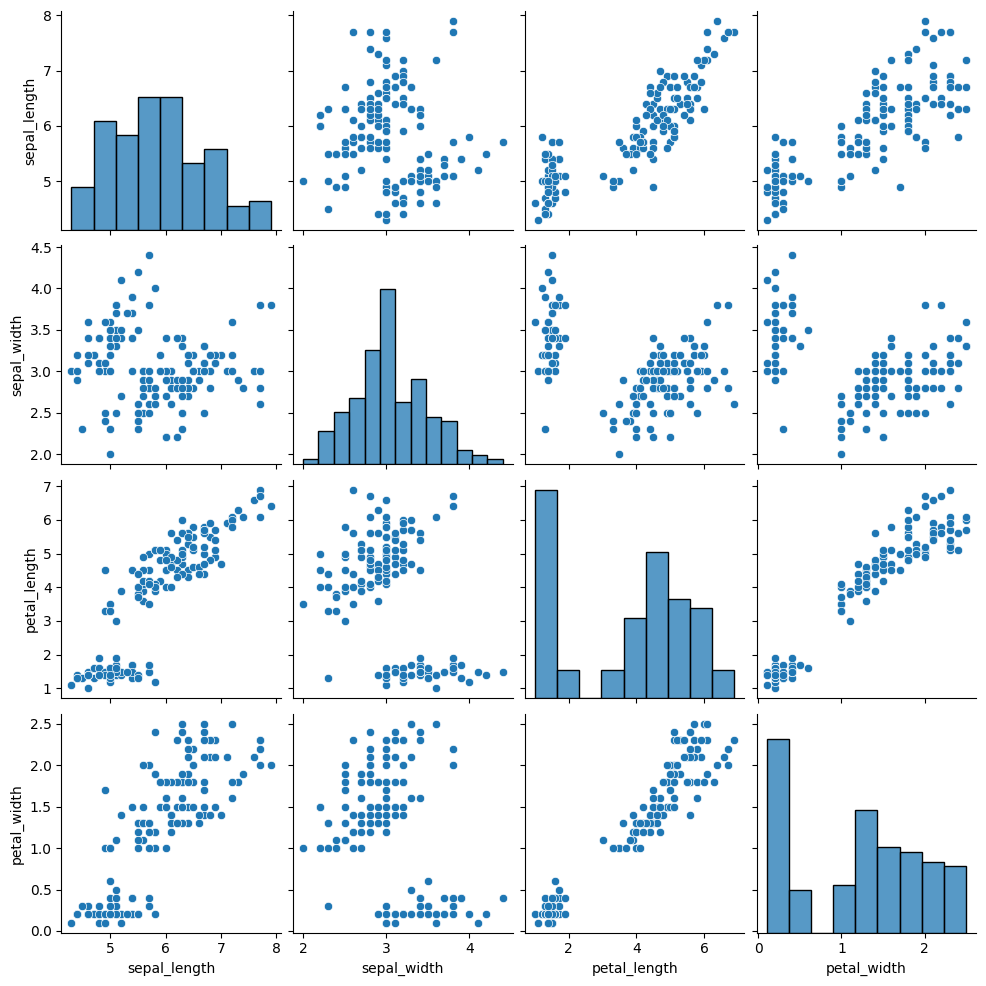

In [103]:
sns.pairplot(iris) #auto detect num columns
#for same col scatterplot would be linear(This line isn’t insightful; it doesn’t tell us about distribution or any relationship) so plots histplot

now for each scatterplot if we need more categorical features in hue

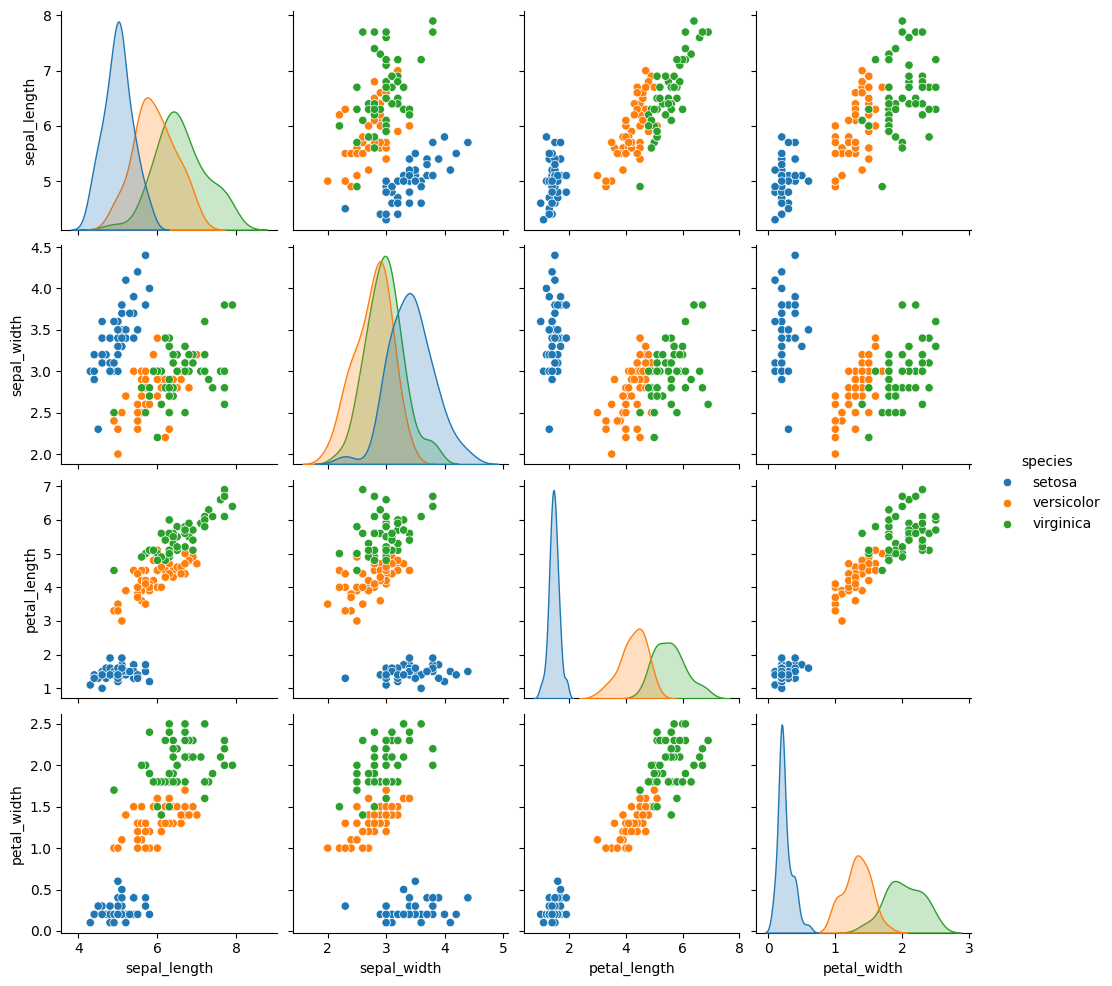

In [105]:
sns.pairplot(iris,hue='species')

# 2) For (Numerical-Categorical) - Barplot

The qsn to ask is again for the categorical class what is the avg numerical value

<Axes: xlabel='Pclass', ylabel='Age'>

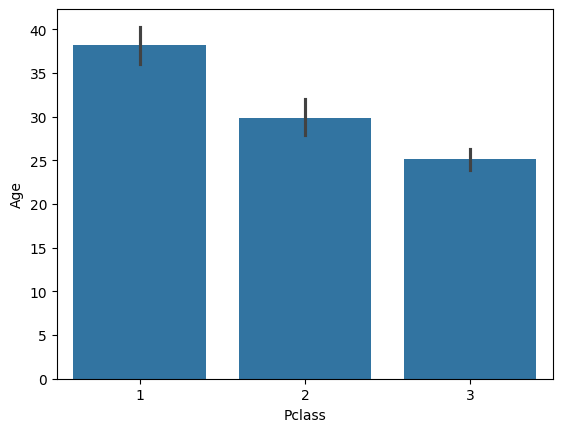

In [70]:
sns.barplot(x='Pclass',y='Age',data = df)

so the avg age of people in first class was around 37 high than others

Note the graph is plotted for the samples of Age right<br>
Here black line represent the Confidence Interval(C.I) 

Suppose CI = 95%:

It means: "We are 95% confident that the true mean of population lies within this error bar.


<Axes: xlabel='Pclass', ylabel='Fare'>

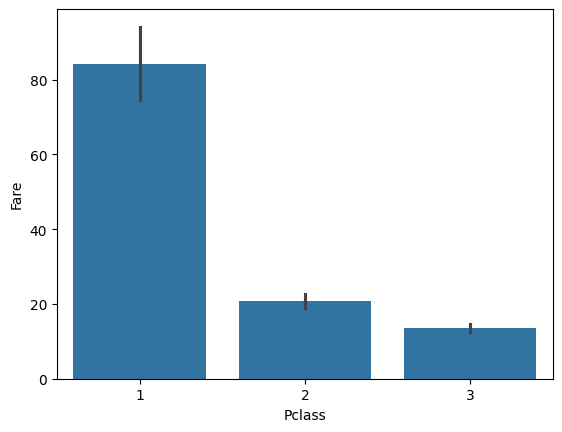

In [72]:
#similarly 
sns.barplot(x='Pclass',y='Fare',data = df)

for more feature say gender

<Axes: xlabel='Pclass', ylabel='Fare'>

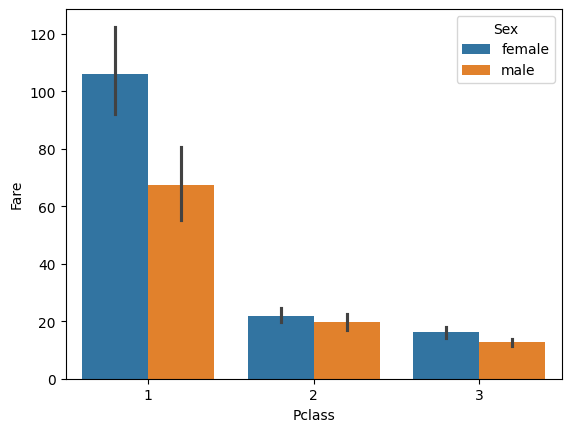

In [74]:
sns.barplot(x='Pclass',y='Fare',data = df,hue='Sex')

so in each class no of males paid avg more fare than female

# Now Boxplot for Numerical - Categorical

<Axes: xlabel='Sex', ylabel='Age'>

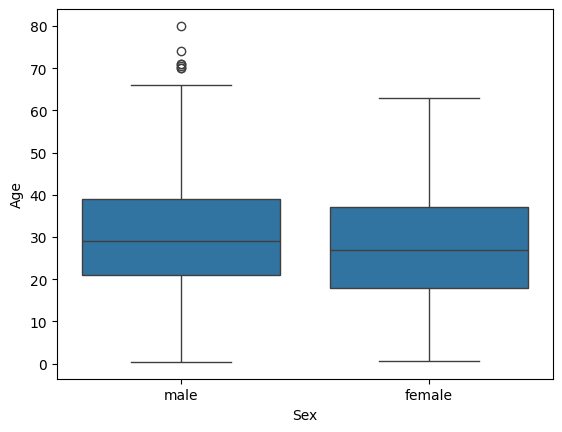

In [75]:
sns.boxplot(x='Sex',y='Age',data = df)

also hue

<Axes: xlabel='Sex', ylabel='Age'>

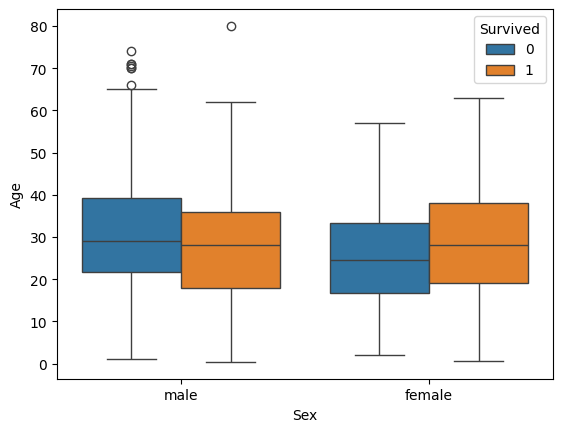

In [76]:
sns.boxplot(x='Sex',y='Age',data = df,hue='Survived')

# kdeplot (Numerical - Categorical)

note distplot is used for univariate analysis for num feature <br>
but we can smartly combine two features like this since displot made two sep figures we used kdeplot


To compare prob curve of age for both survived and not survived

<Axes: xlabel='Age', ylabel='Density'>

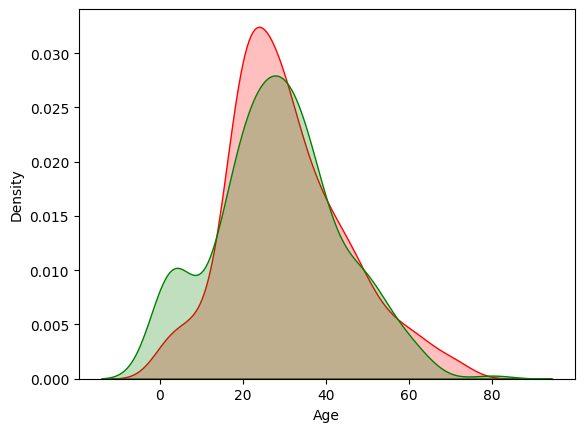

In [88]:
sns.kdeplot(data=df[df['Survived'] == 0]['Age'], fill=True, label='Did Not Survive', color='red')
sns.kdeplot(data=df[df['Survived'] == 1]['Age'], fill=True, label='Survived', color='green')

## Categorical - Categorical

say qsn is in each pclass how many survived and not survived

firstly using countplot and hue

<Axes: xlabel='Sex', ylabel='count'>

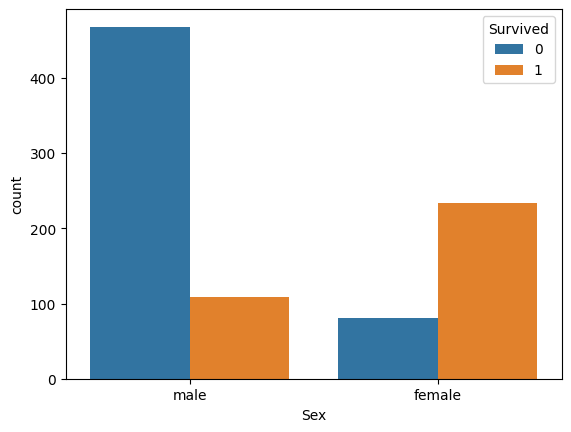

In [89]:
sns.countplot(x='Sex', hue='Survived', data=df)

secondly Crosstab + Heatmap

In [92]:
cross = pd.crosstab(df['Pclass'],df['Survived'])
cross

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

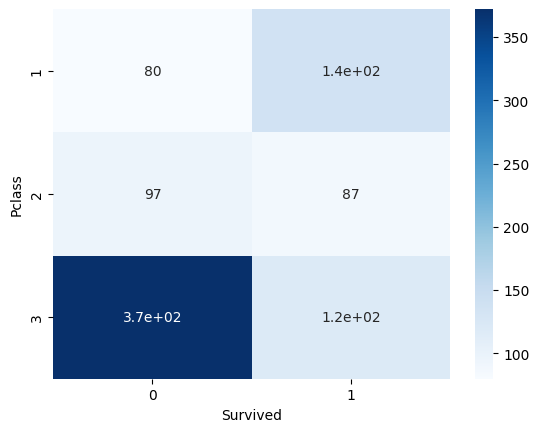

In [96]:
sns.heatmap(cross,annot=True,cmap='Blues')

we found that pclass 3 died more but it could be that since more people were in the class 3 more died 

so if we need % of people died in each class

In [97]:
cross = pd.crosstab(df['Pclass'], df['Survived'], normalize='index')
cross

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


ie for first number 80/(80+136) = 0.370

<Axes: xlabel='Survived', ylabel='Pclass'>

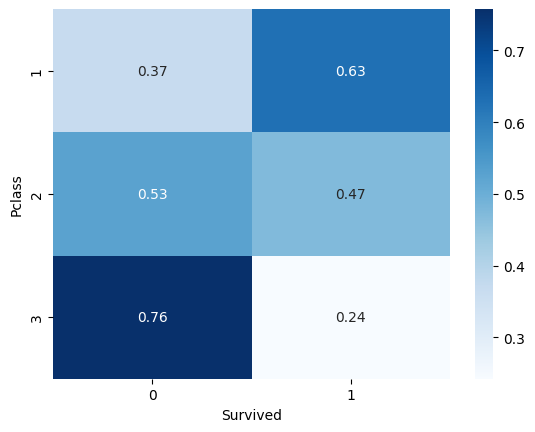

In [98]:
sns.heatmap(cross,annot=True,cmap='Blues')